<a href="https://colab.research.google.com/github/ben-marlin/ctis210exam1a/blob/main/Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Before you start, save a COPY with a name like "My Name Exploration 2.ipynb". Do not edit this file. If you turn in a link to this file, I will not grade your assignment!**

In a huge number of examples you'll encounter in calculus, we use piecewise defined functions like $$f(x) = \begin{cases} 3-x^2 & \text{if } |x| < 1 \\ e^{-|x-1|} & \text{otherwise}\end{cases}$$

Below, we define $f$ and plot it using `sympy`.

In [ ]:
pip install sympy_plot_backends  # You have to run this before importing spb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from sympy import *

x = Symbol('x',real=true)

f = Piecewise(
    (3-x**2, abs(x) < 1),    # note expression followed by condition
    (exp(-(abs(x)-1)), true)    # code only gets here if other fails
    )                           # think of it as saying "otherwise"

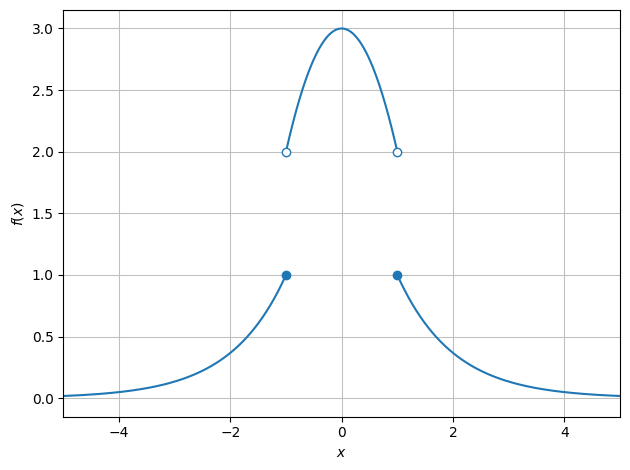

In [ ]:
from spb import *               # sympy plotting backends - must pip install first!

plot_piecewise(f, xlim=(-5,5))
                                # I was floored by this graph. Extraordinary!

<font color = red> **1. Now it's your turn!
Use this idea to define and plot the function** $$g(x) = \begin{cases} 0 & \text{if } x\le 0 \\ 2x & \text{if } 0 < x \le \frac{1}{2} \\ 2x-1 & \text{if } \frac{1}{2} < x \le 1 \\ 1 & \text{if } x > 1\end{cases}$$

In [ ]:
from sympy import *

x = Symbol('x',real=true)

f = Piecewise(
    (3-x**2, abs(x) < 1),    # note expression followed by condition
    (exp(-(abs(x)-1)), true)    # code only gets here if other fails
    )                           # think of it as saying "otherwise"

Remembering the simplification `sympy` does for polynomials, it would be nice if it did something similar for trigonometric functions, right?

In [ ]:
from sympy import *

x = Symbol('x',real=true)

simplify(1-cos(x)**2)

sin(x)**2

In [ ]:
simplify(tan(x) * cos(x))

sin(x)

In [ ]:
expand((1-cos(x))/sin(x))

-cos(x)/sin(x) + 1/sin(x)

The following illustrates that `sympy` doesn't do things unless you tell it to, though. Notice how it gets $\sin^2(x)+\cos^2(x)$ but doesn't turn it into 1?

In [ ]:
factor(sin(x)**4*cos(x)**2 + sin(x)**2*cos(x)**4)

(sin(x)**2 + cos(x)**2)*sin(x)**2*cos(x)**2

But if you tell it to simplify, it knows what to do. Better yet, it seems to know about multiple angle rules!

In [ ]:
simplify(factor(sin(x)**4*cos(x)**2 + sin(x)**2*cos(x)**4))

1/8 - cos(4*x)/8

So I thought we could test that out by getting $\cos^2(x)-\sin^2(x)$, which you know to be $\cos(2x)$, but will `sympy`?

In [ ]:
simplify(factor(sin(x)**4*cos(x)**2 - sin(x)**2*cos(x)**4))

-cos(2*x)/16 + cos(6*x)/16

OK, then! Let's try to use this to verify a trig identity. $$\dfrac{1+\cot x}{\csc x} = \sin x + \cos x$$

Of course, you start with the more difficult looking side.

In [ ]:
simplify((1+cot(x))/csc(x))

sqrt(2)*sin(x + pi/4)

That simplified it a little too much. Let's try another way.

In [ ]:
expand((1+cot(x))/csc(x))

cot(x)/csc(x) + 1/csc(x)

In [ ]:
simplify(cot(x)/csc(x))

cos(x)

In [ ]:
simplify(1/csc(x))

sin(x)

That may seem a little primitive - breaking it up term-by-term. But it lets us get each piece...

Now, I wonder...

In [ ]:
simplify(sqrt(2)*sin(x+pi/4))  # nope! too simple.

sqrt(2)*sin(x + pi/4)

In [ ]:
expand(sqrt(2)*sin(x+pi/4))  # nope!

sqrt(2)*sin(x + pi/4)

In [ ]:
expand(sqrt(2)*sin(x+pi/4),trig=true) # aha! found this option stackoverflow

sin(x) + cos(x)

<font color = red> **2. Your turn! Use these ideas to verify the identity $$(1+\sin(x))(1+\sin(-x))=\cos^2(x)$$**

It would also be nice if we could use `sympy` to solve trig equations, wouldn't it? Lets try something easy first: $\cos(x) = \frac{\sqrt{3}}{2}$.

In [ ]:
solve(Eq(cos(x),sqrt(3)/2),x) # notice i needed Eq(f(x),val) to
                              # represent f(x) == val. and also!
                              # it did both solutions in [0,2pi)

[pi/6, 11*pi/6]

<font color = red> **3. Your turn! Find solutions to $\sin(x)\cos(x) = 0$ over $[0,2\pi)$. You should be able to solve this by inspection.**

<font color = red> **4. Experiment with setting $\sin(2x)$ for special values, such as $0, \frac{1}{2},\frac{\sqrt{2}}{2},\frac{\sqrt{3}}{2},1$. You'll be graded on how much you actually experiment with here, not so much whether you have right answers. Add more cells so you can try more things!**

We should probably be able to do the same sort of thing for exponential and logarithmic equations. Let's try something straightforward like $e^x = 1$.

In [ ]:
solve(Eq(exp(x),1),x)

[0]

In [ ]:
solve(Eq(exp(x**2-1),1),x)

[-1, 1]

In [ ]:
solve(Eq(exp(x),E),x)

[1]

<font color=red> **5. Your turn! Use this idea to find all solutions to $e^{2x}-e^x-6=0$. If you spot that this is similar to the equation $x^2-x-6=0$, you might expect two solutions, but one is imaginary.**

As a matter of fact, this can do a pretty robust job, even solving things like $a^{linear_1}=b^{linear_2}$ where $a,b$ are different and $linear_i$ are different linear functions.

<font color = red> **6. Your turn again! Go find an example from homework, class examples, or the text and solve it this way.**

OK, now on to new material! We've been doing limits recently, so let's get `sympy` to do our limits for us. Bear in mind that it can't show its work like you can, though.

In [ ]:
limit((x**2-x-6)/(x**2-2*x-8),x,-2)

5/6

In [ ]:
limit(sin(x)/x,x,0)

1

In [ ]:
limit((x**2-x-6)/(x**2-2*x-8),x,4) # oh, i don't like that...

oo

In [ ]:
limit((x**2-x-6)/(x**2-2*x-8),x,4,dir="-")

-oo

In [ ]:
limit((x**2-x-6)/(x**2-2*x-8),x,4,dir="+")

oo

That's actually very interesting! It knows the two sided limits are different, but doesn't check them unless told to... I wonder if it's checking the right unless told otherwise? Let's try one where we know the limit from the right is $-\infty$...

In [ ]:
limit(tan(x),x,pi/2)    # apparently so!

-oo

<font color = red> **7. Your turn! Go find an example from online homework that has a limit that does not exist because of a vertical asymptote. Use sided limits to show this.**

Finally, we should test whether it can do limits at $\pm\infty$.

In [ ]:
limit(sqrt(x**2-1)/x,x,oo)

1

In [ ]:
limit(sqrt(x**2-1)/x,x,-oo)

-1

<font color = red> **8. Now go find an example from the online homework or your text with limits as $x\to\infty$ and $x\to -\infty$. Find something interesting!**

<font color = red> **9. And now... find one that requires the Squeeze Theorem (typically with $\sin(1/x)$ or some such).**

<font color = red> **10. Finally... make sure you named the file like I suggested and gave me editor privileges! And delete that first bold-face text cell with the warning so I know you got to the end...**

These are links I used while making this assignment.

https://www.youtube.com/watch?v=RqR-e4KXnIM

https://www.google.com/search?q=sympy+symbol+for+infinity&rlz=1C5CHFA_enUS880US880&oq=sympy+symbol+for+infinity&aqs=chrome..69i57j33i160l3.7015j0j7&sourceid=chrome&ie=UTF-8

https://sympy-plot-backends.readthedocs.io/en/latest/install.html

https://saturncloud.io/blog/how-to-install-a-library-permanently-in-colab/#:~:text=Installing%20a%20library%20permanently%20in%20Colab%20is%20a%20simple%20process,available%20in%20your%20Colab%20notebook.

https://colab.research.google.com/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb

https://sympy-plot-backends.readthedocs.io/en/latest/install.html